In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



This Notebook predicts House prices in Metropolitan Areas of India specifically Hyderabad using House specifications.

This prediction was done using the following steps of Machine Learning workflow:

    1. Data Preparation
        - import
        - explore
        - split
    
    2. Building a Model
        - baseline
        - iterate
        - evaluate

    3. Results communication

In [80]:
# Importing other libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from ipywidgets import IntSlider, interact
from glob import glob

In [81]:
hyd = pd.read_csv(r"C:\Users\USER\Downloads\python project 2/Hyderabad.csv")
hyd

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [82]:
# taking a look at the dataframes
hyd.info()
hyd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


#### From the above output, several things were noted:

    1. Hyderabad dataset has 2518 records and these records have 40 columns
    2. Except for 'Location', all the other columns have integers
    3. All the columns except for 'Price', 'Area' and 'No. of Bedrooms' show that Onehotencoding was done
        - In this scenario, the OneHotEncoding aspect represent whether a house has such a property as 1 or not as 0

In [83]:
hyd.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


#### Note: 

Besides the 'Price', 'Area' and 'No. of Bedrooms' columns , all the other columns are supposed to have 50% as 0.5, 75% as 0.75 and a max of 1 since OneHotEncoding already happened as mentioned earlier

However, it is been noted that there is an occurence of 9 judging from the describe function mostly on 50%, 75% and max.

So whether there is 9 need to be changed to null and removed because this is not supposed to be there in the first place.

But firstly, the columns have to be checked of the available values.

In [84]:
# Listing all the columns first
hyd.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [85]:
# Using column 'MaintenanceStaff' as an example
hyd["MaintenanceStaff"].unique()

array([0, 1, 9], dtype=int64)

#### Note:

As it is shown with the column 'MaintenanceStaff', values that were supposed to be present include 0 and 1 only not 9.

It is time to substitute 9 with nan and finally remove these records.

In [86]:
hyd.replace(9, np.nan, inplace=True)
hyd.dropna(inplace=True)
hyd.isnull().sum() / len(hyd) * 100

Price                  0.0
Area                   0.0
Location               0.0
No. of Bedrooms        0.0
Resale                 0.0
MaintenanceStaff       0.0
Gymnasium              0.0
SwimmingPool           0.0
LandscapedGardens      0.0
JoggingTrack           0.0
RainWaterHarvesting    0.0
IndoorGames            0.0
ShoppingMall           0.0
Intercom               0.0
SportsFacility         0.0
ATM                    0.0
ClubHouse              0.0
School                 0.0
24X7Security           0.0
PowerBackup            0.0
CarParking             0.0
StaffQuarter           0.0
Cafeteria              0.0
MultipurposeRoom       0.0
Hospital               0.0
WashingMachine         0.0
Gasconnection          0.0
AC                     0.0
Wifi                   0.0
Children'splayarea     0.0
LiftAvailable          0.0
BED                    0.0
VaastuCompliant        0.0
Microwave              0.0
GolfCourse             0.0
TV                     0.0
DiningTable            0.0
S

The columns have been reduced from 6206 to 1951 after removing the values 9 that were present in the dataset

In [87]:
hyd.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.434000e+03,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,9.844925e+06,1644.151602,2.626130,0.221446,0.116270,0.454807,0.423583,0.329910,0.268694,0.316763,...,0.698850,0.062038,0.317584,0.043961,0.030813,0.021775,0.035333,0.043550,0.042317,0.025472
std,8.852947e+06,748.134812,0.685046,0.415305,0.320614,0.498056,0.494227,0.470277,0.443371,0.465310,...,0.458852,0.241274,0.465632,0.205050,0.172848,0.145978,0.184657,0.204133,0.201353,0.157588
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1165.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1820.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After removing the 9, it appears 'Wifi' and 'Wardrobe' column do not have 1 meaning that all the houses don't have this or rather such data was not collected so the columns also have to be dropped.

In [88]:
hyd.drop(columns = ['Wifi', 'Wardrobe'], inplace=True)
hyd.shape

(2434, 38)

The dataset now has 38 columns.

**Now, it is time to identify what columns are strongly correlated to 'Price'**

In [89]:
# Selecting columns with number values only, that is, removing location
number_columns = hyd.select_dtypes(exclude='object')

#checking the correlation using numerical values
number_columns.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
Price,1.000000,0.848414,0.631230,0.212661,0.150873,0.279595,0.307008,0.272001,0.306941,0.238538,...,0.252721,0.157111,0.085597,0.232410,0.016948,-0.041442,0.123374,0.091100,0.069477,0.108696
Area,0.848414,1.000000,0.794961,0.180604,0.210016,0.301295,0.324624,0.279482,0.341898,0.276505,...,0.266863,0.171242,0.061434,0.283532,-0.001150,-0.033000,0.100211,0.072674,0.056526,0.096431
No. of Bedrooms,0.631230,0.794961,1.000000,0.143768,0.194256,0.251620,0.282202,0.254163,0.303814,0.233713,...,0.229972,0.172538,0.048378,0.296364,-0.029248,-0.041514,0.097882,0.068729,0.025366,0.076831
Resale,0.212661,0.180604,0.143768,1.000000,0.025715,-0.079763,-0.066704,-0.008042,-0.017468,-0.039848,...,-0.123145,0.011474,0.252517,-0.057765,0.073871,-0.049289,0.198394,0.219501,0.254658,0.190102
MaintenanceStaff,0.150873,0.210016,0.194256,0.025715,1.000000,0.309618,0.319374,0.426985,0.433594,0.414243,...,0.285332,0.207375,0.023609,0.421575,-0.015260,0.276494,-0.001425,0.000006,-0.002038,0.022707
Gymnasium,0.279595,0.301295,0.251620,-0.079763,0.309618,1.000000,0.886798,0.696285,0.650623,0.580553,...,0.825204,0.518636,-0.036515,0.509419,-0.002674,0.195222,0.072899,0.120157,0.100219,0.087987
SwimmingPool,0.307008,0.324624,0.282202,-0.066704,0.319374,0.886798,1.000000,0.730102,0.686463,0.619141,...,0.781098,0.499296,-0.030887,0.531469,0.002744,0.208001,0.060104,0.110663,0.081888,0.083053
LandscapedGardens,0.272001,0.279482,0.254163,-0.008042,0.426985,0.696285,0.730102,1.000000,0.745596,0.675507,...,0.591636,0.426322,0.033267,0.606229,0.024294,0.254118,0.044992,0.111831,0.124289,0.102855
JoggingTrack,0.306941,0.341898,0.303814,-0.017468,0.433594,0.650623,0.686463,0.745596,1.000000,0.692986,...,0.594056,0.377701,-0.048307,0.657591,0.010171,0.278073,0.068326,0.054682,0.025061,0.078480
RainWaterHarvesting,0.238538,0.276505,0.233713,-0.039848,0.414243,0.580553,0.619141,0.675507,0.692986,1.000000,...,0.576765,0.416172,-0.057959,0.707860,-0.034004,0.256760,0.049689,0.027546,0.006158,0.052469


<AxesSubplot:>

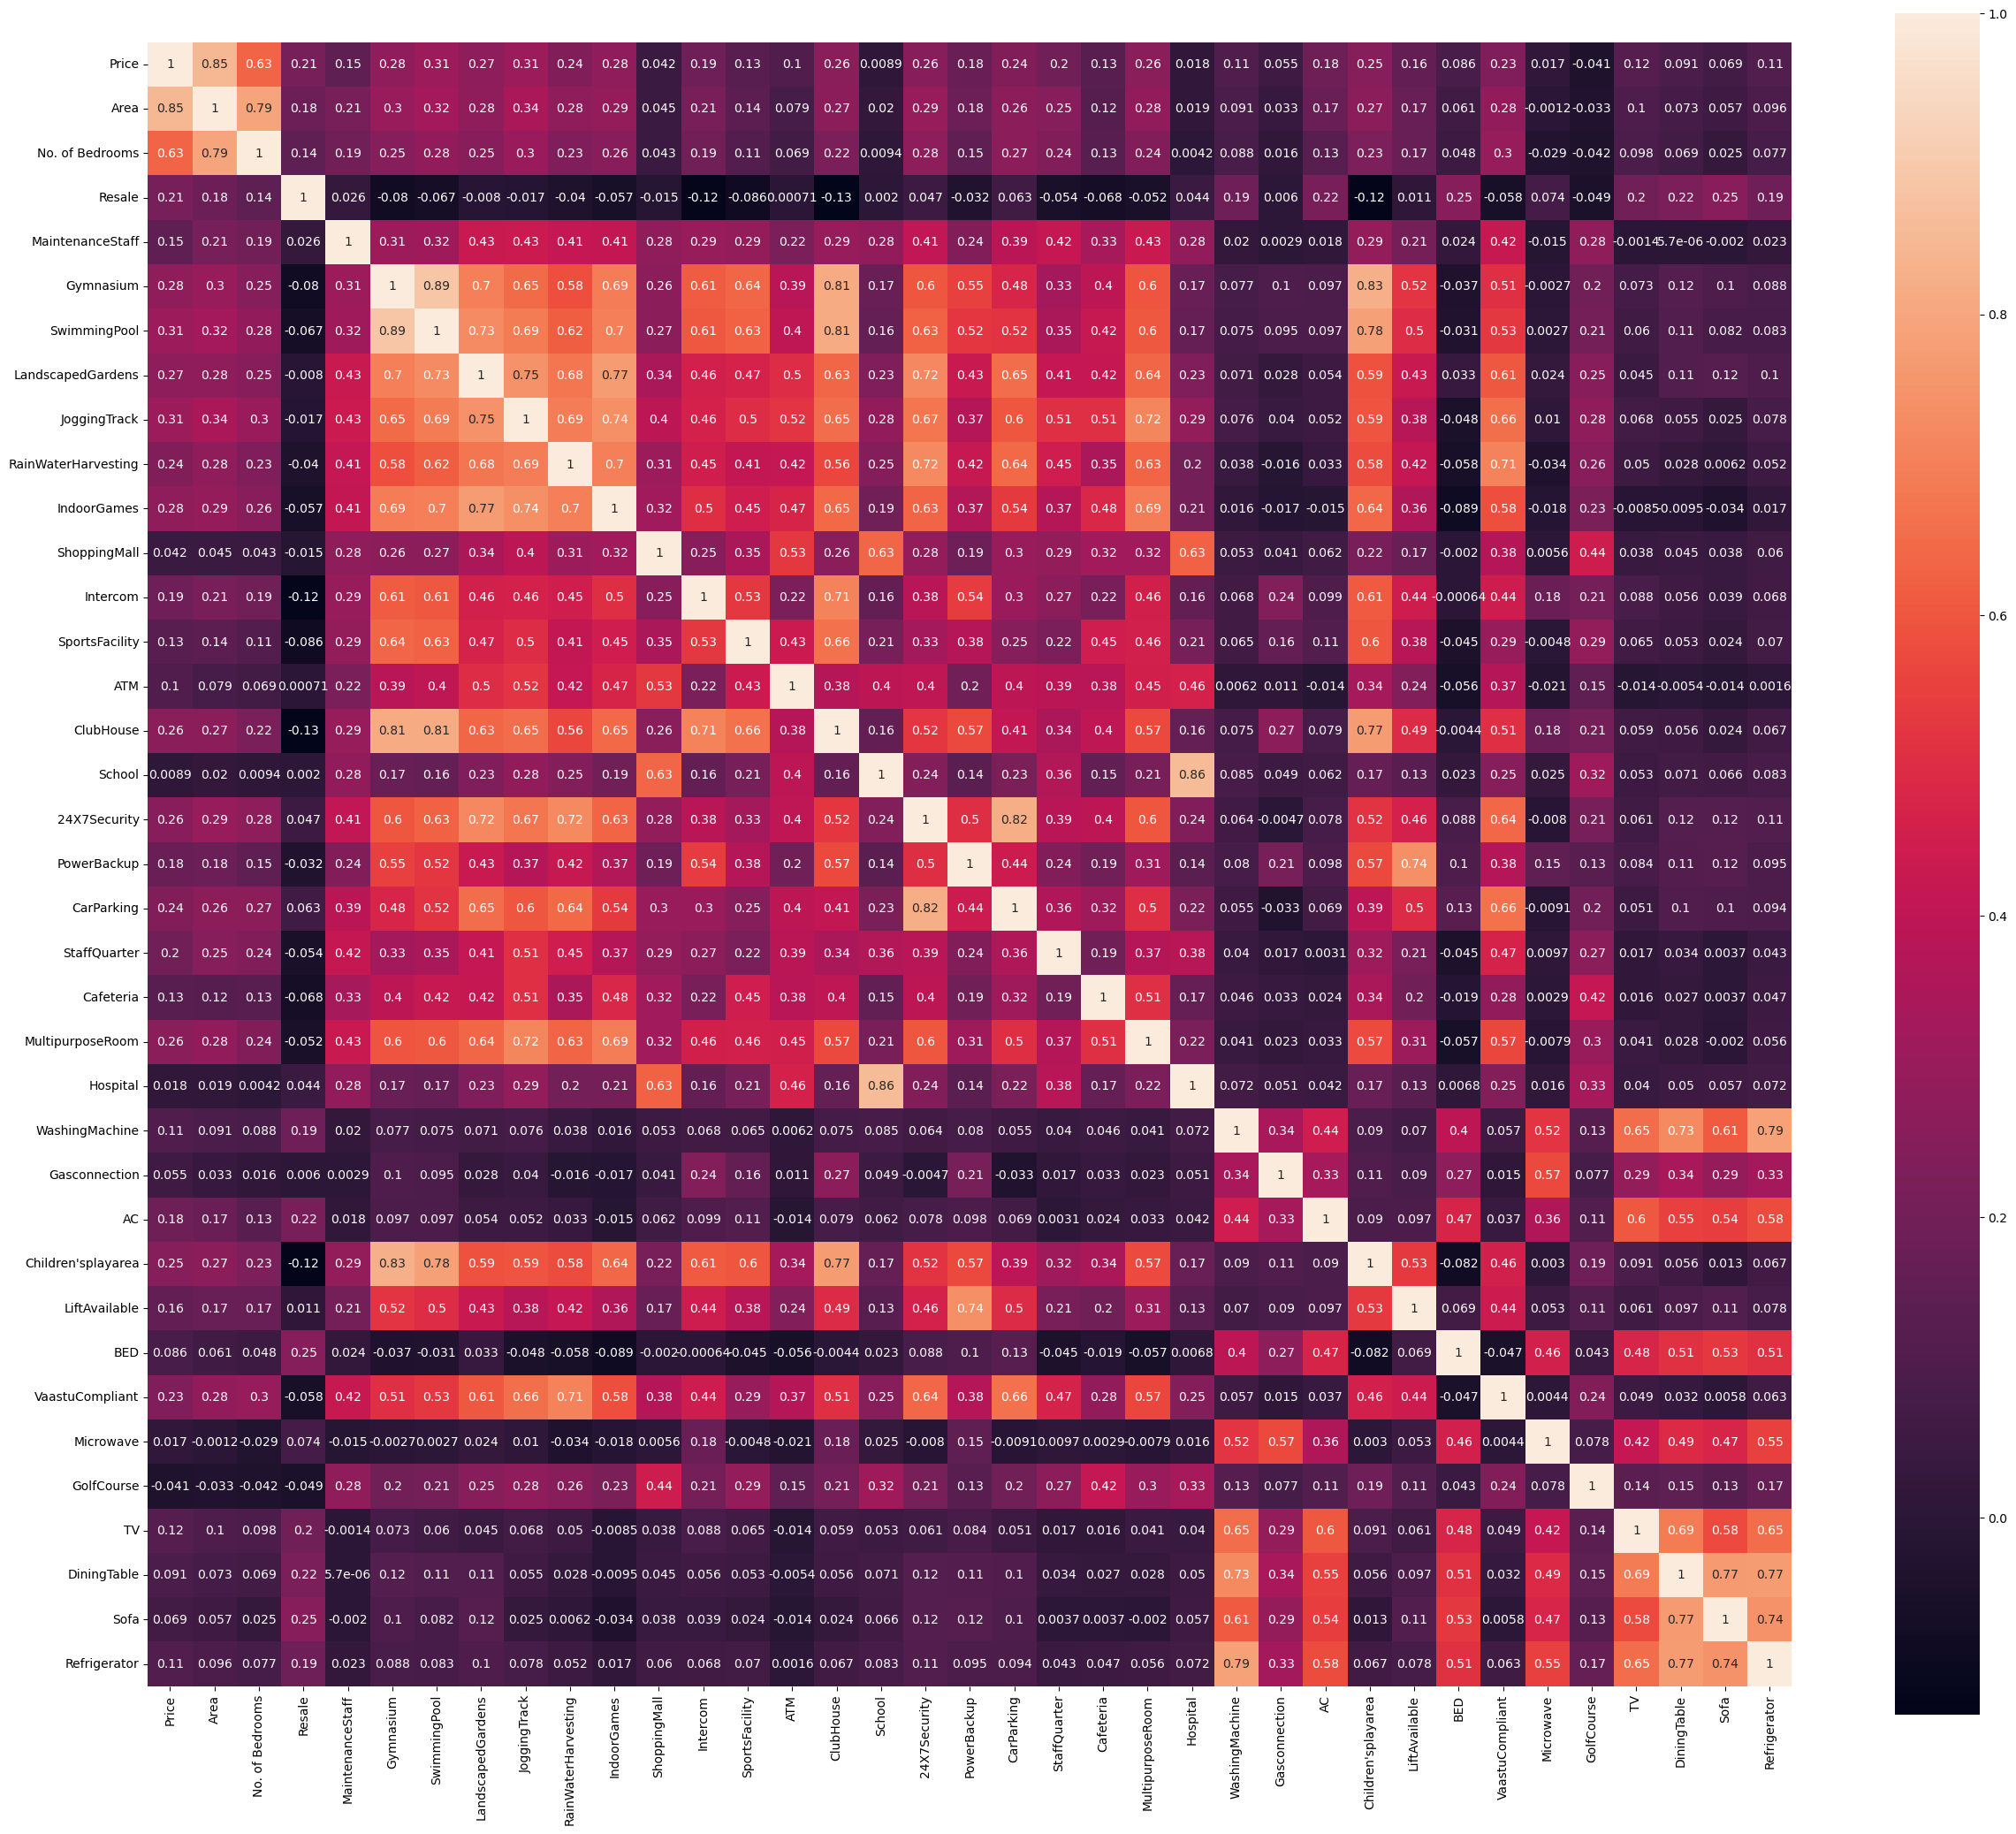

In [90]:
# checking the correlation using a heatmap
numbers_correlation = number_columns.corr()
plt.figure(figsize=(30,25))
sns.heatmap(numbers_correlation, annot=True, square=True)

#### Note

- As it is shown in the correlation table as well as the heatmap, 'Price' has a strong correlation with 'Area' only and a moderate correlation with 'No. of rooms'

- This is because a house with alot of area usually has alot of rooms that is why 'Area' and 'No. of rooms' have a strong correlation as well.

Plotting the data points using:

    1. Scatterplot
    2. Regression plot

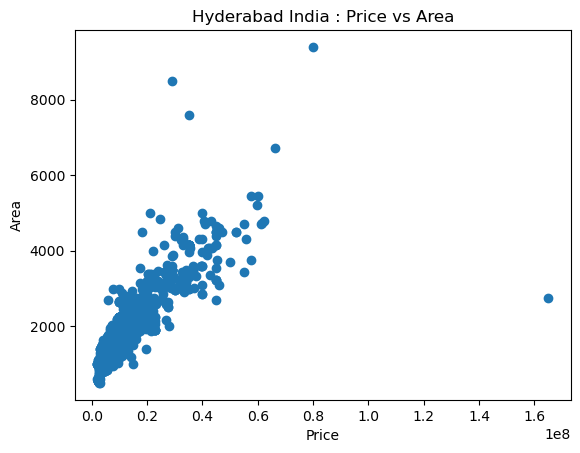

In [91]:
plt.scatter(x = hyd['Price'], y=hyd['Area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Hyderabad India : Price vs Area');

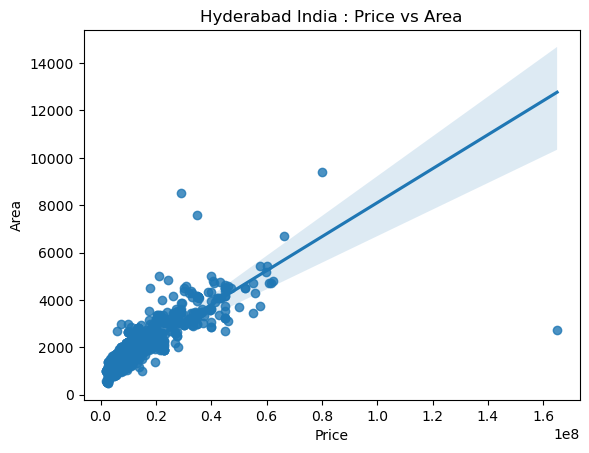

In [92]:
sns.regplot(x = hyd['Price'], y=hyd['Area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Hyderabad India : Price vs Area');

It has been noted that there some values in the 'Price'that have to be removed.

**NOTE** : Usually a neighborhood has houses that are extremely higher in price than others but in this case,these are few and are skewing the results.

In [93]:
# Trying to identify them
normal_house_range = hyd["Price"]< 100000000
normal_house_range.value_counts()

True     2433
False       1
Name: Price, dtype: int64

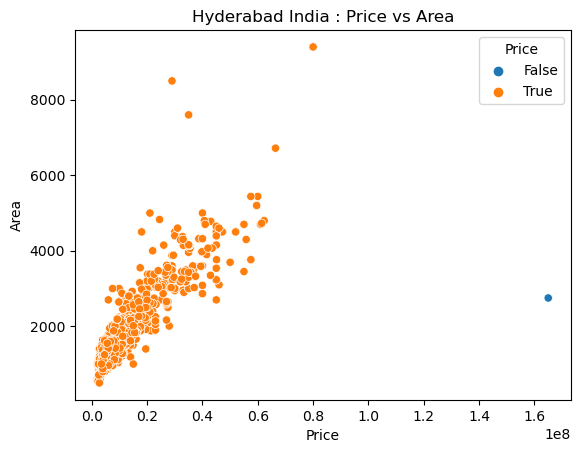

In [94]:
# Trying to separate the values using a scatterplot with 'color attribute'
sns.scatterplot(x = hyd['Price'], y=hyd['Area'], hue=normal_house_range)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Hyderabad India : Price vs Area');

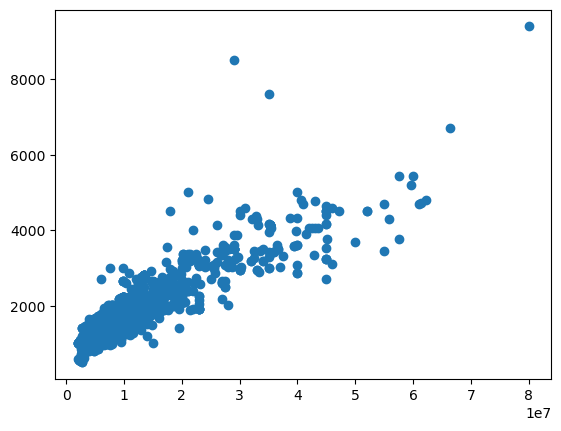

In [95]:
# Removing the expensive houses
hyd = hyd[normal_house_range]
plt.scatter(x = hyd['Price'], y=hyd['Area']);

#### The Split section

This is the first part of the actual model developing after the data has been imported and explored.

A key part in any model-building project is separating your **target** (the thing you want to predict) from your **features** (the information your model will use to make its predictions). 

And from what has been observed about 'Price' and 'Area', 'Area' will be the key feature for the prediction.

In [96]:
# 'Price' as the target vector
target = "Price"

# 'Area' as the feature matrix
feature = ["Area"]
X_train = hyd[feature]
y_train = hyd[target]

Now is the time to develop a Baseline 
- this checks how good the model has to perform inorder to be useful i.e. basically setting up a performance that the baseline needs to beat inorder to be worth it.
- this is a naive or dumb model that can only make a single prediction, that is, the average 'Price'

Start by finding the mean for the y_train and then making a baseline prediction list for it to visualize.


In [97]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)


len(y_pred_baseline) == len(y_train)

True

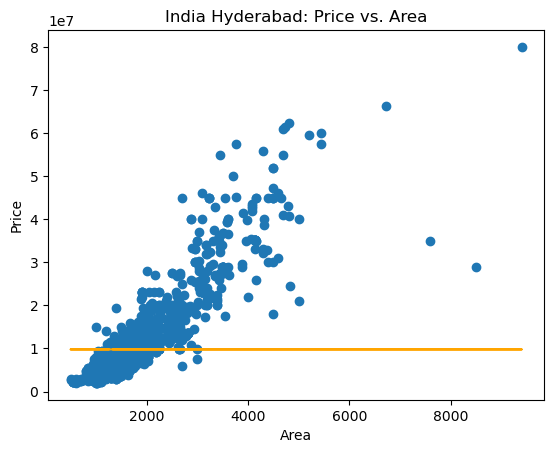

In [98]:
plt.plot( X_train.values,  y_pred_baseline, color="orange")
plt.scatter(x = X_train, y = y_train)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("India Hyderabad: Price vs. Area");

It appears the baseline model does not follow the trend of the data. The next step is to extract the **performance metric**, the one to be used is **mean absolute error**

In [99]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 9781153.69
Baseline MAE: 5144314.85


What this shows is that if we predicted House 'Price' by \\$9,373,975.77, the predictions would be off by an average of \\$4,996,317.04. It also tells that the mean absolute error should be below \\$4,996,317.04.

#### Iterate

The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance

To build a model, there is need to:
1. Instatiate a model - create a model
2.Train the model
3. Predict the model


In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

#### Evaluate

Generating the prediction

In [102]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([ 6767732.2899976 , 28180395.66837819,  6549438.22404562,
        6321221.70055037,  4832853.0690596 ])

In [103]:
mae_training = mean_absolute_error(y_train, y_pred_training)

print("Training MAE:", round(mae_training, 2))

Training MAE: 2205010.25


#### Good news:

Our model beat the baseline by over \$2,775,864.11! That's a good indicator that it will be helpful in predicting Houses prices. But the real test is how the model performs on data that it hasn't seen before, data that we call the **test set**

This **test set** will be taken from **Chennai dataset**.

In [104]:
chennai = pd.read_csv(r"C:\Users\USER\Downloads\python project 2\Chennai.csv")
chennai


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,7834999,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5010,2408000,740,Ambattur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5011,5500000,1700,Pallikaranai VGP Shanti Nagar,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5012,3400000,1599,Korattur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [105]:
X_test = chennai[['Area']]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    6.470059e+06
1    4.644326e+06
2    6.440291e+06
3    2.919249e+07
4    1.033982e+07
dtype: float64

## Communicating the results

The model has been built now communication has to be made using: 
    
    1. a formula
    2. using a data viz

#### Using a formula 

In [106]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: -6528360.82


In [107]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "area":', coefficient)

Model coefficient for "area": 9922.46


In [108]:
print(f"apt_price = {intercept} + {coefficient} * area")

apt_price = -6528360.82 + 9922.46 * area


#### The formula:

apt_price = -6528360.82 + 9922.46 * surface_covered



#### Using a data viz

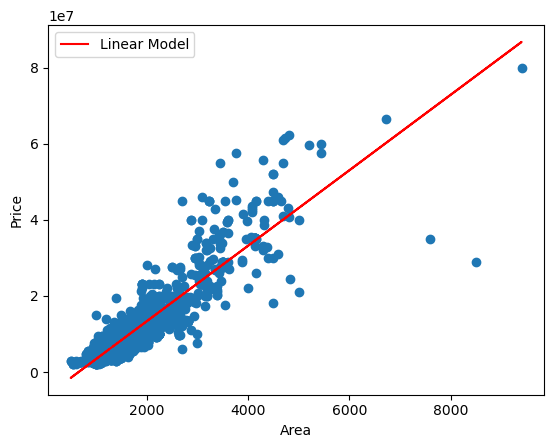

In [109]:
plt.plot(X_train.values, model.predict(X_train), color="r", label= "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend();

### The last section puts the model to good use by:

    1. Building a Prediction function that can predict 'Price' given House 'Area'.
    2. Building an interactive Slider for easier User experience.

#### Defining the function as 'make prediction'

In [110]:
# Defining the function as 'make prediction'
def make_prediction(area):
    data = {
        "Area" : area,
        
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted  price: ${prediction}"

In [111]:
make_prediction(9999)

'Predicted  price: $92686292.16'

#### Developing an interactive User interface for easier finding of the Price using Area